# Average Order Value

What is AOV?
> "average amount of money each customer spends per transaction with your store"

Customizing it to better understand our data.


In [6]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv("sales.csv", index_col='order_id')

In [4]:
df.head()

,shop_id,user_id,order_amount,total_items,payment_method,created_at
order_id,,,,,,
1,53,746,224,2,cash,2017-03-13 12:36:56
2,92,925,90,1,cash,2017-03-03 17:38:52
3,44,861,144,1,cash,2017-03-14 4:23:56
4,18,935,156,1,credit_card,2017-03-26 12:43:37
5,18,883,156,1,credit_card,2017-03-01 4:35:11


In [5]:
df['order_amount'].describe()

count      5000.000000
mean       3145.128000
std       41282.539349
min          90.000000
25%         163.000000
50%         284.000000
75%         390.000000
max      704000.000000
Name: order_amount, dtype: float64

The mean is 3145.128, min value is 90, 75th percentile is 390 and max value is 704000.

75% being 390 implies that 75 percent our data points are less than 390.

You see mean is very misleading as its neither representing the 75% of our data, nor the maximum value.

In [9]:
np.percentile(df['order_amount'], 0)

90.0

In [14]:
np.percentile(df['order_amount'], 98)

800.0799999999981

98th percentile is 800 and mean is higher than this too. so, mean line would fall above 98% of our values. 

WHY IS THIS SO ?

There could be two reasons according to me :

1. Large Outliers skewing the mean to a much higher value that it loses its meaning with respect to our data.

2. Above, the mean is being calculated by simply dividing the sum of all the orders' total by the number of orders without taking into account the fact that each order has different quantities being ordered. How can we compare two things that are not in the same units? 

I'll explain both the cases in detail in later sections of the notebook.

# Outliers

The statistical description of 75th and 98th percetile made it clear that there are definitely some very large values that are affecting the mean value so much. 

We'll plot a histogram to visualize the outliers

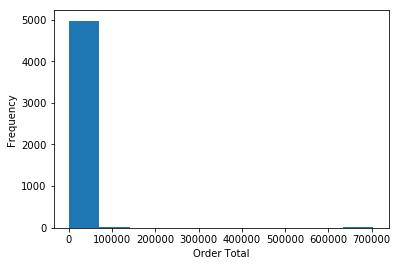

In [32]:
import matplotlib.pyplot as plt
ax = df.order_amount.plot(kind='hist');
plt.xlabel('Order Total')
plt.show()

Above histogram shows a <b>Positively Skewed Dataset</b> showing that most of the data is concentrated on the left portion whereas the long tail represents the outliers.

## Dealing with the Outliers - Naive WAY :)

<b>We're just discarding the Outliers.</b> (Don't do this blindly please)

In [33]:
# lets see outliers by printing values greater than 2000

df[df['order_amount']>2000]

,shop_id,user_id,order_amount,total_items,payment_method,created_at
order_id,,,,,,
16,42,607,704000,2000,credit_card,2017-03-07 4:00:00
61,42,607,704000,2000,credit_card,2017-03-04 4:00:00
161,78,990,25725,1,credit_card,2017-03-12 5:56:57
491,78,936,51450,2,debit,2017-03-26 17:08:19
494,78,983,51450,2,cash,2017-03-16 21:39:35
512,78,967,51450,2,cash,2017-03-09 7:23:14
521,42,607,704000,2000,credit_card,2017-03-02 4:00:00
618,78,760,51450,2,cash,2017-03-18 11:18:42
692,78,878,154350,6,debit,2017-03-27 22:51:43


In [51]:
# Calculating mean of order amount less than $2000

df[df['order_amount']<2000]['order_amount'].mean()

302.58051448247926

In [52]:
np.percentile(df['order_amount'],50)

284.0

Calculating the mean without those 63 outliers took its value down to 302 which is very close to the 50th percentile, which should ideally be the case.

But that's not the solution, right? 
> It's taking out a lot of meaning from our dataset as those 63 values are from two customers only, if you notice. The two customers have frequently placed orders of huge amounts over the last month. Discarding this data would mean losing info that is important, not only for telling the story about this month but also for predicting the AOV in future months.

## Dealing with Outliers in a better way

<b> Finding shop-wise AOV including the outliers :)


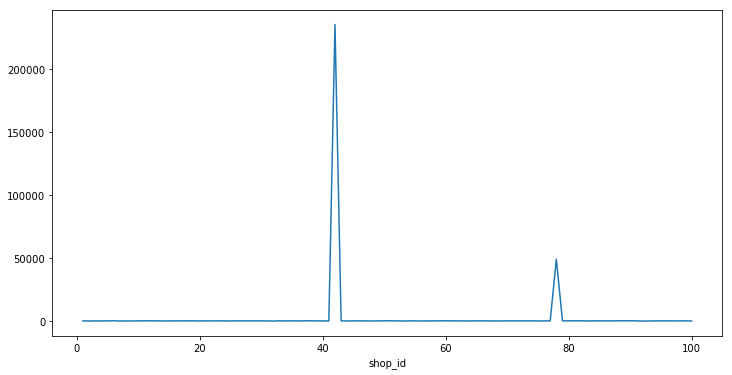

In [59]:
df.groupby(['shop_id'])['order_amount'].mean().plot(figsize=(12,6));


In [73]:
df.groupby(['shop_id'])['order_amount'].mean().head(8)

shop_id
1    308.818182
2    174.327273
3    305.250000
4    258.509804
5    290.311111
6    383.508475
7    218.000000
8    241.043478
Name: order_amount, dtype: float64

What we conclude from this?

1. Only two shops [42, 78] are having the large order amounts.
2. Rest all shops have values near 300 only.

> Shop-wise AOV gives us an insight about the average order amount over each shop.

# Changing Metric used for Analysis

Instead of an average of order-value, we'll go for other metrics like :

1. Average number of items bought per order

2. Average value of each item bought from all the data combined

3. Number of orders placed on each shop
 

1) Average number of items bought per order

Calculate mean of 'total_items' column to get how many items were ordered in one order.

In [67]:
df['total_items'].mean()

#On an average, each order had approx. 9 items [not very true]

8.7872

2) Average value of each item bought 

Make a new column with 'order_amount' divded by 'total_items' so that the value scales down to single unit's price in an order.

Take average of that column

In [68]:
df['new_col'] = df['order_amount']/df['total_items']

In [69]:
df.head()

,shop_id,user_id,order_amount,total_items,payment_method,created_at,order_norm,new_col
order_id,,,,,,,,
1,53,746,224,2,cash,2017-03-13 12:36:56,112.0,112.0
2,92,925,90,1,cash,2017-03-03 17:38:52,90.0,90.0
3,44,861,144,1,cash,2017-03-14 4:23:56,144.0,144.0
4,18,935,156,1,credit_card,2017-03-26 12:43:37,156.0,156.0
5,18,883,156,1,credit_card,2017-03-01 4:35:11,156.0,156.0


In [71]:
df['new_col'].mean()

# The average price of each item that was bought from any of the stores

387.7428

3) Number of Orders placed on each shop

In [88]:
df['shop_id'].value_counts().head(8)

53    68
71    66
19    64
13    63
89    61
69    60
59    60
9     59
Name: shop_id, dtype: int64

# Final Metric (A combination of above metrics)

" For each shop, calculate the Average price of each item being bought and the total no. of items sold from that shop "

Why?

1.Segreagating by Shop_id is done because the Outliers are from two shops only : 42 & 78. This way their values won't skew the metric being used and we won't lose any useful information too (that would have happened if we had just discarded them).
<br>
2.When we scale done to single unit for each order, all the data comes on to the same scale and hence comparisons become relevant. Like comparing of avg. price of each item being bought on Shop 1 to Shop 99.
<br>

Now a question might be there in your mind,
"When you're using Average Price of each item and No. of items sold together, why not directly use Average Order Value? 
Coz Avg order value = Avg. price of 1 item * No. of items sold"

The issue with average order value is that it can be misleading at times. How? See below

In [93]:
# a series of average order values for each shop

ss = df.groupby(['shop_id'])['order_amount'].mean()

In [100]:
ss.sort_values().head(1)

shop_id
92    162.857143
Name: order_amount, dtype: float64

In [112]:
ss.sort_values().tail(2)

shop_id
78     49213.043478
42    235101.490196
Name: order_amount, dtype: float64

Here, Shop 92 has min avg order value while Shop 42 has maximum and Shop 78 the second maximum.

Now, lets look at the number of items that these stores sold.

In [110]:
df[ df['shop_id']== 42]['total_items'].sum()

34063

In [111]:
df[ df['shop_id']== 92]['total_items'].sum()

76

In [113]:
df[ df['shop_id']== 78]['total_items'].sum()

88

You see :
    Shop 42 : high AOV, high number of total items sold
    Shop 92 : low AOV, lower number of items sold
    Shop 78 : high AOV , less no of total items sold
    
   So only looking at the AOV for each shop, you'll think that Shop 78 is selling a lot of shoes but that's not true. It's selling expensive ones, but its overall sales are low.
   
Now, 
> we've seen how AOV can be misleading at times, but if you break it into its components : Avg per item and Total Items bought, and use their combination as a metric, it could give you better insights, I believe.

In [115]:
df.drop(['order_norm','new_col'], axis=1, inplace=True)  

In [119]:
# for each order, price of one item

df['avg_per_item'] = df['order_amount']/df['total_items']

In [133]:
# for each shop, avg. price of each item sold
a = df.groupby(['shop_id'])['avg_per_item'].mean()

In [134]:
a.head()

shop_id
1    158.0
2     94.0
3    148.0
4    128.0
5    142.0
Name: avg_per_item, dtype: float64

In [135]:
# for each shop, total number of items sold from it
b = df.groupby(['shop_id'])['total_items'].sum()

In [137]:
b.head()

shop_id
1     86
2    102
3     99
4    103
5     92
Name: total_items, dtype: int64

In [139]:
newdf = pd.concat([a,b], axis=1)

In [140]:
newdf.head(10)

,avg_per_item,total_items
shop_id,,
1,158.0,86
2,94.0,102
3,148.0,99
4,128.0,103
5,142.0,92
6,187.0,121
7,112.0,109
8,132.0,84
9,118.0,117


In [145]:
newdf.iloc[41]   # shop 42

avg_per_item      352.0
total_items     34063.0
Name: 42, dtype: float64

In [146]:
newdf.iloc[77]   #shop 78

avg_per_item    25725.0
total_items        88.0
Name: 78, dtype: float64

In [147]:
newdf.iloc[91]  #shop 92

avg_per_item    90.0
total_items     76.0
Name: 92, dtype: float64

If total sales in each shop = Revenue generated by that shop. Let's add a third Revenue column to our new_df to make it even more informative about each shop.

[Revenue is same as the shop-wise AOV though, which alone is not very informative]

Note: You could also add Avg. Customer Lifetime in each shop, equal to the AVG. number of times a customer has ordered from the shop.

In [150]:
newdf['revenue_generated'] = newdf['avg_per_item'] * newdf['total_items']

In [154]:
newdf.head()

,avg_per_item,total_items,revenue_generated
shop_id,,,
1,158.0,86,13588.0
2,94.0,102,9588.0
3,148.0,99,14652.0
4,128.0,103,13184.0
5,142.0,92,13064.0


# My Concluding Thoughts

Although, I went through a lot of methods above, I'd still say that one can't discard any of the methods above. Because each metric conveys its own story, and that story might be irrelevant as per one use-case but that doesn't imply that the metric being used is useless or bad. Metrics depend not only on the use-case but also on the data that you're using. Sometimes you'll need to bring all the rows down to a single scale and sometimes the best option would be to remove the outlier, you can never say for sure. In my understanding the important thing is to understand the data you've, what is the goal of your analysis and then decide what's the best metric for you. 

I also tried to do some time-series analysis here, but to make the series regular, I converted it to daily orders data. So I was just left with 30 values, one for each day's order average. It felt less relevant to the question, so I didn't do it further.  But, if it is relevant, I'd love to understand how. 